## Import Datasets

In [118]:
df = spark.read\
       .format("csv")\
       .option("header", "true")\
       .option("nullValue", "NA")\
       .option("delimiter", "\t")\
       .option("inferSchema", "true")\
       .load("gs://pstat135-chen/notebooks/jupyter/project data/VM2Uniform--CT--2021-03-30.tab")

## Calculate Missing Percents

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import sum, col, desc

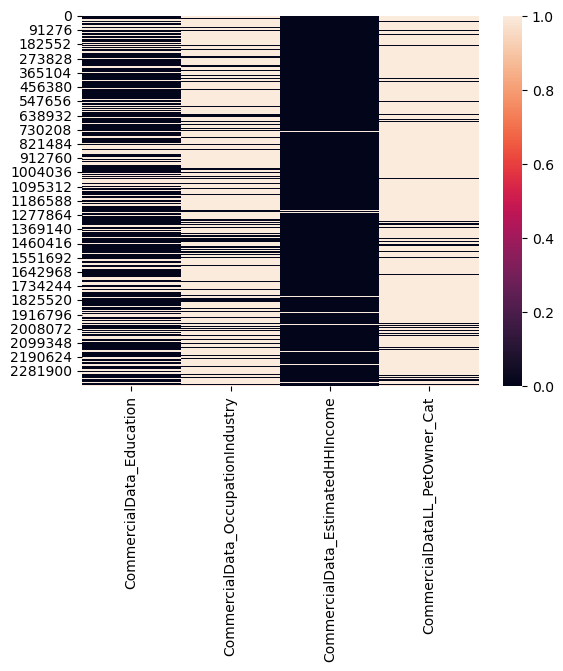

In [108]:
na = df.select('CommercialData_Education','CommercialData_OccupationIndustry',\
                   'CommercialData_EstimatedHHIncome','CommercialDataLL_PetOwner_Cat')
na_map = na.toPandas()

tf_na = na_map.isnull()

sns.heatmap(data=tf_na)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.show()

we can see that the column of dataframe `CommercialData_EstimatedHHIncome` has less missing value, the column of dataframe `CommercialDataLL_PetOwner_Cat` has most missing value.

## Drop Missing Value

In [109]:
all_inte = df.select('CommercialData_Education','CommercialData_OccupationIndustry',\
                   'CommercialData_EstimatedHHIncome','CommercialDataLL_PetOwner_Cat')\
.na.drop(subset=['CommercialData_Education','CommercialData_OccupationIndustry',\
                   'CommercialData_EstimatedHHIncome','CommercialDataLL_PetOwner_Cat'])

## Display the Data

In [110]:
all_inte.show(10)
print('Total Records in dataset',all_inte.count())

+------------------------+---------------------------------+--------------------------------+-----------------------------+
|CommercialData_Education|CommercialData_OccupationIndustry|CommercialData_EstimatedHHIncome|CommercialDataLL_PetOwner_Cat|
+------------------------+---------------------------------+--------------------------------+-----------------------------+
|    Bach Degree - Ext...|                            Other|                    $25000-34999|                          Yes|
|    Grad Degree - Ext...|                            Other|                    $50000-74999|                          Yes|
|    Grad Degree - Ext...|                    Manufacturing|                    $50000-74999|                          Yes|
|    HS Diploma - Extr...|                       Management|                  $150000-174999|                          Yes|
|    Bach Degree - Ext...|                            Other|                  $200000-249999|                          Yes|
|    Bac

Total Records in dataset 90982


## Display schema and columns of DataFrame

In [111]:
all_inte.printSchema()

root
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_OccupationIndustry: string (nullable = true)
 |-- CommercialData_EstimatedHHIncome: string (nullable = true)
 |-- CommercialDataLL_PetOwner_Cat: string (nullable = true)



In [112]:
all_inte.columns

['CommercialData_Education',
 'CommercialData_OccupationIndustry',
 'CommercialData_EstimatedHHIncome',
 'CommercialDataLL_PetOwner_Cat']

## Data Sorting

In [113]:
all_inte.orderBy(all_inte.CommercialData_EstimatedHHIncome).show(15)

+------------------------+---------------------------------+--------------------------------+-----------------------------+
|CommercialData_Education|CommercialData_OccupationIndustry|CommercialData_EstimatedHHIncome|CommercialDataLL_PetOwner_Cat|
+------------------------+---------------------------------+--------------------------------+-----------------------------+
|    HS Diploma - Extr...|                            Other|                     $1000-14999|                          Yes|
|    HS Diploma - Extr...|                    Manufacturing|                     $1000-14999|                          Yes|
|    Bach Degree - Ext...|                       Management|                     $1000-14999|                          Yes|
|    Bach Degree - Ext...|                            Other|                     $1000-14999|                          Yes|
|    HS Diploma - Extr...|                    Manufacturing|                     $1000-14999|                          Yes|
|    Som

In [114]:
all_inte.groupby('CommercialData_Education').count().sort(desc('count')).show()

+------------------------+-----+
|CommercialData_Education|count|
+------------------------+-----+
|    Bach Degree - Ext...|33787|
|    HS Diploma - Extr...|21863|
|    Grad Degree - Ext...|17496|
|    Some College -Ext...| 8027|
|    Grad Degree - Likely| 2868|
|    Some College - Li...| 2256|
|     HS Diploma - Likely| 1941|
|    Bach Degree - Likely| 1808|
|    Vocational Techni...|  612|
|    Less than HS Dipl...|  288|
|    Less than HS Dipl...|   36|
+------------------------+-----+



We can see that Bacherlor degree has the highest proprotion of `CommercialData_Education` in our state dataset.